In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy import units as u
from astropy.table import Table, hstack, vstack
from astropy.cosmology import FlatLambdaCDM

import math
import mpl_style

%matplotlib inline

H0 = 70.
cosmo = FlatLambdaCDM(H0, Om0=0.3)
h = H0/100

In [46]:
galaxy_table = Table(fits.getdata('galaxy_table_update_cmplt.fits'))
group_table = Table(fits.getdata('group_table_update_cmplt.fits'))

In [48]:
galaxy_table.info

<Table length=12352>
        name          dtype 
-------------------- -------
          galaxy_num   int64
           group_num   int64
         NYU-VAGC_ID   int64
                   z float32
              mstell float32
                ssfr float32
           pfeatures float32
             centsat   int64
           M_r-5logh float64
               color float64
       halo_mass_lum float64
    halo_mass_mstell float64
           redorblue    str4
      passiveorSFing    str7
        completeness float64
               n_gal   int64
           cent_ssfr float32
        cent_redblue    str4
       sfing_central    str7
          cent_pfeat float32
           cent_mass float32
         sat_sf_frac float64
       sat_blue_frac float64
     sat_spiral_frac float64
     sat_smooth_frac float64
sat_spiral_half_frac float64
    median_sat_pfeat float32

In [3]:
#cell initializing different indices for use later
#group_table indices
pair_ind = np.where(group_table['n_gal'] == 2)[0]
group_ind = np.where(group_table['n_gal'] > 2)[0]

halo_mass_val_ind = np.where(group_table['halo_mass_lum'] > 2)[0]
cent_mass_val_ind = np.where(group_table['cent_mstell'] > 0)[0]


high_sat_sf_ind = np.where(group_table['sat_sf_frac'] > 0.5)
low_sat_sf_ind = np.where(group_table['sat_sf_frac'] < 0.5)

spiral_sat_ind = np.where(group_table['sat_spiral_frac'] > 0.5)[0]
smooth_sat_ind = np.where(group_table['sat_smooth_frac'] > 0.5)[0]
int_sat_ind = np.intersect1d(np.where(group_table['sat_spiral_frac'] <= 0.5)[0], np.where(group_table['sat_smooth_frac'] <= 0.5)[0])

spiral_half_sat_ind = np.where(group_table['sat_spiral_half_frac'] > 0.5)[0]
smooth_half_sat_ind = np.where(group_table['sat_spiral_half_frac'] < 0.5)[0]

high_mass_halo_ind = np.where(group_table['halo_mass_lum'] >= 13 - np.log10(h))[0]
low_mass_halo_ind = np.where(group_table['halo_mass_lum'] < 13 - np.log10(h))[0]
low_mass_halo_ind = np.intersect1d(low_mass_halo_ind, np.where(group_table['halo_mass_lum'] > 2)[0])

high_mass_cent_ind = np.where(group_table['cent_mstell'] >= 10.5)[0]
low_mass_cent_ind = np.where(group_table['cent_mstell'] < 10.5)[0]

sf_cent_ind = np.where(group_table['sfing_central'] == 'SFing')[0]
passive_cent_ind = np.where(group_table['sfing_central'] == 'passive')[0]

red_cent_ind = np.where(group_table['cent_redblue'] == 'red')[0]
blue_cent_ind = np.where(group_table['cent_redblue'] == 'blue')[0]

spiral_cent_ind = np.where(group_table['cent_pfeat'] >= 0.8)[0]
smooth_cent_ind = np.where(group_table['cent_pfeat'] <= 0.2)[0]
int_cent_ind = np.intersect1d(np.where(group_table['cent_pfeat'] < 0.8)[0],np.where(group_table['cent_pfeat'] > 0.2)[0])
    
spiral_half_cent_ind = np.where(group_table['cent_pfeat'] >= 0.5)[0]
smooth_half_cent_ind = np.where(group_table['cent_pfeat'] < 0.5)[0]
    
#central morphology/color of groups
redelliptical_cent_ind = np.intersect1d(red_cent_ind, smooth_cent_ind) 
blueelliptical_cent_ind = np.intersect1d(blue_cent_ind, smooth_cent_ind)
redspiral_cent_ind = np.intersect1d(red_cent_ind, spiral_cent_ind)
bluespiral_cent_ind = np.intersect1d(blue_cent_ind, spiral_cent_ind)

#galaxy_table indices
cent_ind = np.where(galaxy_table['centsat'] == 1)[0]
sat_ind = np.where(galaxy_table['centsat'] == 2)[0]

mass_val_ind_gal = np.where(galaxy_table['mstell'] > 0)[0] #remove galaxies without measured mass
halo_mass_val_ind_gal = np.where(galaxy_table['halo_mass_lum'] > 2)[0]

pair_ind_gal = np.where(galaxy_table['n_gal'] == 2)[0]
group_ind_gal = np.where(galaxy_table['n_gal'] > 2)[0]

spiralgal_ind_gal = np.where(galaxy_table['pfeatures'] >= 0.8)[0] #these are the properties of each galaxy
intgal_ind_gal = np.intersect1d(np.where(galaxy_table['pfeatures'] < 0.8)[0],np.where(galaxy_table['pfeatures'] > 0.2)[0])
smoothgal_ind_gal = np.where(galaxy_table['pfeatures'] <= 0.2)[0]

passivegal_ind_gal = np.where(galaxy_table['passiveorSFing'] == 'passive')[0]
SFinggal_ind_gal = np.where(galaxy_table['passiveorSFing'] == 'SFing')[0]

passivesat_ind_gal = np.where(galaxy_table['sat_sf_frac'] < 0.5)[0]
SFingsat_ind_gal = np.where(galaxy_table['sat_sf_frac'] > 0.5)[0]

smoothsat_ind_gal = np.where(galaxy_table['sat_smooth_frac'] > 0.5)[0]
spiralsat_ind_gal = np.where(galaxy_table['sat_spiral_frac'] > 0.5)[0]
intsat_ind_gal = np.intersect1d(np.where(galaxy_table['sat_spiral_frac'] <= 0.5)[0], np.where(galaxy_table['sat_smooth_frac'] <= 0.5)[0])


spiral_cent_ind_gal = np.where(galaxy_table['cent_pfeat'] >= 0.8)[0] #these are central properties
smooth_cent_ind_gal = np.where(galaxy_table['cent_pfeat'] <= 0.2)[0]

redgal_ind_gal = np.where(galaxy_table['redorblue'] == 'red')[0]
bluegal_ind_gal = np.where(galaxy_table['redorblue'] == 'blue')[0]

#galaxies with SF and color properties
redactive_gal_ind_gal = np.intersect1d(SFinggal_ind_gal, redgal_ind_gal)
blueactive_gal_ind_gal = np.intersect1d(SFinggal_ind_gal, bluegal_ind_gal)
redpassive_gal_ind_gal = np.intersect1d(passivegal_ind_gal, redgal_ind_gal)
bluepassive_gal_ind_gal = np.intersect1d(passivegal_ind_gal, bluegal_ind_gal)

red_cent_ind_gal = np.where(galaxy_table['cent_redblue'] == 'red')[0]
blue_cent_ind_gal = np.where(galaxy_table['cent_redblue'] == 'blue')[0]
                             
#central morphology/color
redelliptical_cent_ind_gal = np.intersect1d(red_cent_ind_gal, smooth_cent_ind_gal) 
blueelliptical_cent_ind_gal = np.intersect1d(blue_cent_ind_gal, smooth_cent_ind_gal)
redspiral_cent_ind_gal = np.intersect1d(red_cent_ind_gal, spiral_cent_ind_gal)
bluespiral_cent_ind_gal = np.intersect1d(blue_cent_ind_gal, spiral_cent_ind_gal)

#all galaxies morphology/color
redelliptical_ind_gal = np.intersect1d(redgal_ind_gal, smoothgal_ind_gal)
blueelliptical_ind_gal = np.intersect1d(bluegal_ind_gal, smoothgal_ind_gal)
redspiral_ind_gal = np.intersect1d(redgal_ind_gal, spiralgal_ind_gal)
bluespiral_ind_gal = np.intersect1d(bluegal_ind_gal, spiralgal_ind_gal)

sf_cent_ind_gal = np.where(galaxy_table['sfing_central'] == 'SFing')[0]
passive_cent_ind_gal = np.where(galaxy_table['sfing_central'] == 'passive')[0]

high_mass_halo_ind_gal = np.where(galaxy_table['halo_mass_lum'] >= 13 - np.log10(h))[0]
low_mass_halo_ind_gal = np.where(galaxy_table['halo_mass_lum'] < 13 - np.log10(h))[0]

high_mass_cent_ind_gal = np.where(galaxy_table['cent_mass'] >= 10.5)[0]
low_mass_cent_ind_gal = np.where(galaxy_table['cent_mass'] < 10.5)[0]

In [51]:
grp_hmass_ind_gal = np.intersect1d(halo_mass_val_ind_gal, group_ind_gal)
#print(len(grp_hmass_ind_gal))
#print(len(group_ind_gal))

grp_hmass_ind = np.intersect1d(halo_mass_val_ind, group_ind)
print(len(grp_hmass_ind))
print(len(halo_mass_val_ind))
print(len(pair_ind))
print(len(group_table))

1266
3269
2028
3305


Text(0,0.5,'Number')

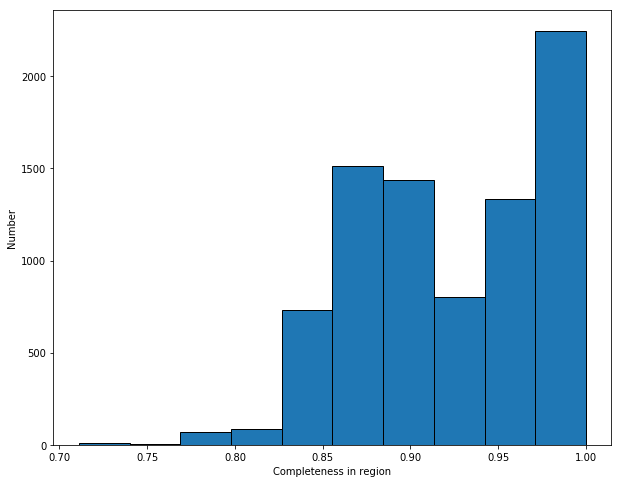

In [14]:
#histogram of completeness in region for all galaxies in sample
all_completeness = galaxy_table['completeness'][grp_hmass_ind_gal]

f = plt.figure(figsize=(10,8))

hist, bins = np.histogram(all_completeness, density=False)

widths = bins[1:] - bins[:-1]
x = bins[:-1] + widths/2

plt.bar(x, hist, widths, edgecolor='k')

plt.xlabel('Completeness in region for all galaxies in sample')
plt.ylabel('Number')

In [34]:
group_comp = group_table['member_completeness']

memb_comp = []
comp_mean = []
for st in group_comp:
    grp_comp = [float(x) for x in st[1:-1].split(',')]
    memb_comp.append(grp_comp)
    comp_mean.append(np.mean(grp_comp))



[[0.8770764, 0.969697, 0.95, 0.95, 0.8770764, 0.8770764, 0.95, 0.8770764, 0.8770764, 0.8770764, 0.8770764, 0.8770764, 0.8770764, 0.8770764, 0.95, 0.8770764, 0.8770764, 0.8770764, 0.8770764, 1.0, 1.0, 1.0, 0.8770764, 0.8770764, 0.9539474, 0.9539474, 0.9285714, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9259259, 0.9833102, 0.9259259, 0.9833102, 0.9259259, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 1.0, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.9833102, 0.8450704